In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# I split the data into two columns in Excel
df = pd.read_csv("airline-passengers.csv")
df = df["Passengers"]
df = np.array(df).reshape(-1,1)
df

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [3]:
df.shape

(144, 1)

In [4]:
# Normalize the data
sc = MinMaxScaler()
df = sc.fit_transform(df)
df.min(), df.max()

(0.0, 1.0)

In [5]:
# Split the dataset so we can make a new dataset
train = 93
test = 51
train, test = df[0:train,:], df[train:len(df),:]

In [6]:
print(train.shape)
print(test.shape)

(93, 1)
(51, 1)


In [7]:
def get_data(df, look_back):
    dataX, dataY = [],[]
    for i in range(len(df) - look_back- 1):
        a = df[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(df[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [9]:
print(x_train.shape)
print(y_train.shape)

(91, 1)
(91,)


In [10]:
x_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [11]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [12]:
x_test, y_test = get_data(test, look_back)

In [13]:
print(x_test.shape)
print(y_test.shape)

(49, 1)
(49,)


In [14]:
x_test

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [15]:
y_test

array([0.32239382, 0.38996139, 0.40733591, 0.38030888, 0.48648649,
       0.47104247, 0.48455598, 0.61389961, 0.6969112 , 0.7007722 ,
       0.57915058, 0.46911197, 0.38803089, 0.44787645, 0.45559846,
       0.41312741, 0.4980695 , 0.47104247, 0.5       , 0.63899614,
       0.74710425, 0.77413127, 0.57915058, 0.49227799, 0.3976834 ,
       0.44980695, 0.49420849, 0.45945946, 0.58301158, 0.56370656,
       0.61003861, 0.71042471, 0.85714286, 0.87837838, 0.69305019,
       0.58494208, 0.4980695 , 0.58108108, 0.6042471 , 0.55405405,
       0.60810811, 0.68918919, 0.71042471, 0.83204633, 1.        ,
       0.96911197, 0.77992278, 0.68918919, 0.55212355])

In [16]:
# Turn data into a 3D dataset
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
print(x_train.shape)
print(x_test.shape)

(91, 1, 1)
(49, 1, 1)


In [18]:
# Build model
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fit the model
model.fit(x_train, y_train, epochs = 100, batch_size = 1)

Epoch 1/100
91/91 [==============================] - 2s 2ms/step - loss: 0.0430 - accuracy: 0.0110
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.0110
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.0110
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.0110
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.0110
Epoch 6/100
91/91 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.0141   - 0s 2ms/step - loss: 0.0132 - accuracy: 0.0110
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.0110
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.0110
Epoch 9/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.0110
Epoch 10/100
91/91 [==============================] - 0s 2ms/st

91/91 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0110
Epoch 83/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0110
Epoch 84/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0110
Epoch 85/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0110
Epoch 86/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0110 ETA: 0s - loss: 0.0017 - accuracy: 0.04
Epoch 87/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0110
Epoch 88/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0110
Epoch 89/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0110
Epoch 90/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0110
Epoch 91/100
91/91 [==============================] - 0s 2ms/step - loss:

In [21]:
y_pred = model.predict(x_test)

In [22]:
# Bring values back to original values
y_pred = sc.inverse_transform(y_pred)

In [23]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = sc.inverse_transform(y_test)

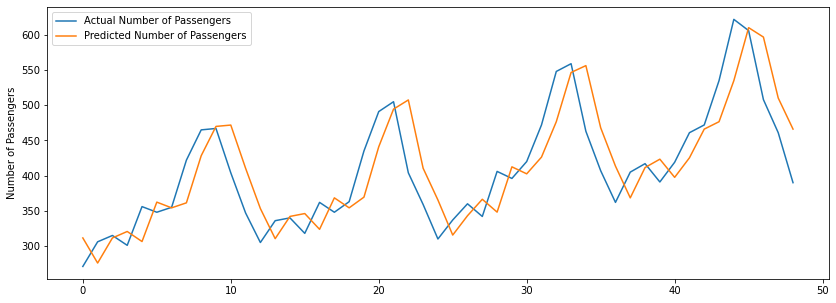

In [24]:
plt.figure(figsize = (14,5))
plt.plot(y_test, label = "Actual Number of Passengers")
plt.plot(y_pred, label = "Predicted Number of Passengers")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [25]:
df = pd.read_csv("airline-passengers.csv")
df = df["Passengers"]
df = np.array(df).reshape(-1,1)
df

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [26]:
df.shape

(144, 1)

In [27]:
sc = MinMaxScaler()
df = sc.fit_transform(df)
df.min(), df.max()

(0.0, 1.0)

In [28]:
train = 93
test = 51
train, test = df[0:train,:], df[train:len(df),:]

In [29]:
print(train.shape)
print(test.shape)

(93, 1)
(51, 1)


In [30]:
def get_data(df, look_back):
    dataX, dataY = [],[]
    for i in range(len(df) - look_back- 1):
        a = df[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(df[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [32]:
print(x_train.shape)
print(y_train.shape)

(91, 1)
(91,)


In [33]:
x_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [34]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [ ]:
x_test, y_test = get_data(test, look_back)

In [ ]:
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
model = Sequential()
model.add(LSTM(1, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "sgd", metrics = ["accuracy"])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_test, y_test))

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = sc.inverse_transform(y_pred)

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = sc.inverse_transform(y_test)

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(y_test, label = "Actual Number of Passengers")
plt.plot(y_pred, label = "Predicted Number of Passengers")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()